In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split


Vote majoritaire : $ g_{\mathcal{A}} = sign \left(\sum_{k=1}^L g_k(x) \right) $
$$\begin{align}P \left(sign(g_\mathcal{A}(x) = y \right)
&= P \left[sign(\sum_{k=1}^L sign(f_i(x)))= y \right] \\
&= P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} > \frac L2 \right] \\
&= 1 - P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} \ge \frac L2 \right] \\
&= 1 -  \sum_{k=1}^{\frac L2} {L \choose k} p^k (1-p)^{L-k}
\end{align}$$

Vote majoritaire : $ g_{\mathcal{A}} = sign \left(\sum_{k=1}^L g_k(x) \right) $
$$\begin{align}P \left(sign(g_\mathcal{A}(x) = y \right)
&= P \left[sign(\sum_{k=1}^L sign(f_i(x)))= y \right] \\
&= P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} > \frac L2 \right] \\
&= 1 - P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} \le \frac L2 \right] \\
&= 1 -  \sum_{k=1}^{\frac L2} {L \choose k} p^k (1-p)^{L-k}\\
&\ge  p = 0.7 
\end{align}$$

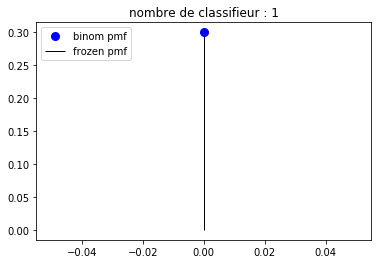

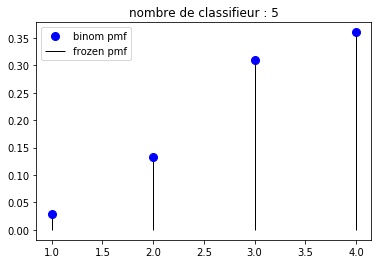

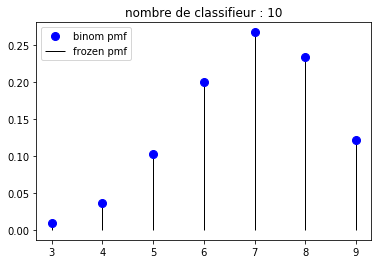

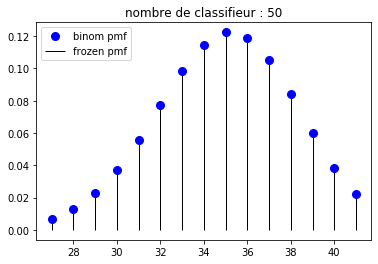

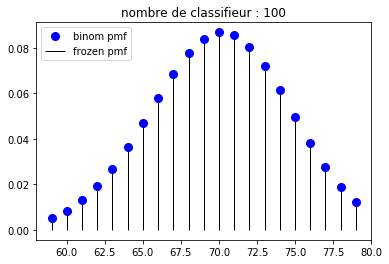

In [4]:
p=0.7

Ls= [1,5,10,50,100]
#classifieurs binaires independants dont la probabilité de prédire correctement est p>0.5
k=1
for L in Ls:
    
    x = np.arange(binom.ppf(0.01,L,p),binom.ppf(0.99,L,p))
    rv=binom(L,p)

    fig,ax = plt.subplots(1,1)
    #pmf : probability mass function
    ax.plot(x,binom.pmf(x,L,p),'bo', ms=8, label = 'binom pmf')
    ax.vlines(x,0,rv.pmf(x), colors='k', linestyles = '-', lw=1, label = 'frozen pmf')
    ax.legend(loc = 'upper left')
    plt.title("nombre de classifieur : " +str(L))
    plt.show()
    
    k += 1



### Bagging

### Q2. 
Mettez en oeuvre le Bagging avec des arbes de régession de pronfondeur 1 (en Anglais stumps) puis avec des arbres plus profonds

In [5]:
#create a random dataset

rng = np.random.RandomState(1)
X=np.sort(5*rng.rand(80,1), axis=0)
y=np.sin(X).ravel()
y[::5] += 1*(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()

### Q3.

Illustrer graphiquement le rôle de L (n_estimator) ainsi que la profondeur des arbres (max_depth) en jouant sur ces deux paramètres

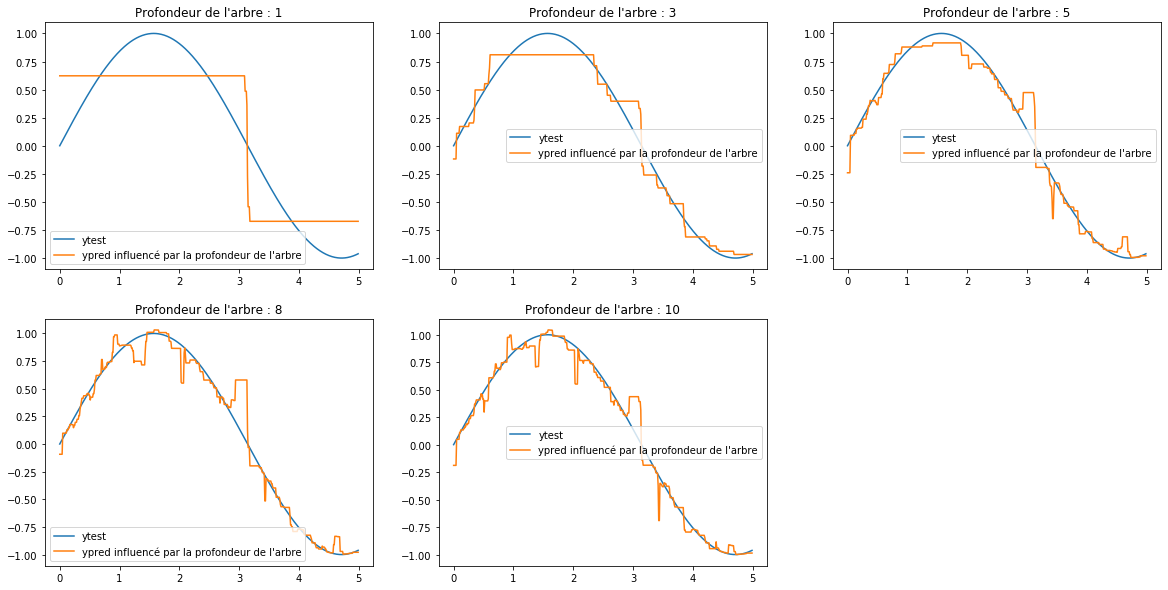

In [6]:
#bagging : diminuer la variance sans modifier l'esperance

k=1
Depths= [1,3,5,8,10]
plt.figure(figsize=(20,10))

for depth in Depths:
    
    
    regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth)).fit(X,y)
    plt.subplot(2,3,k)
    plt.plot(X_test,y_test, label = "ytest")

    plt.plot(X_test,regr.predict(X_test), label = "ypred influencé par la profondeur de l'arbre")
    
    plt.title("Profondeur de l'arbre : " + str(depth))
    plt.legend(loc="best")
    
    k = k+1

plt.show()

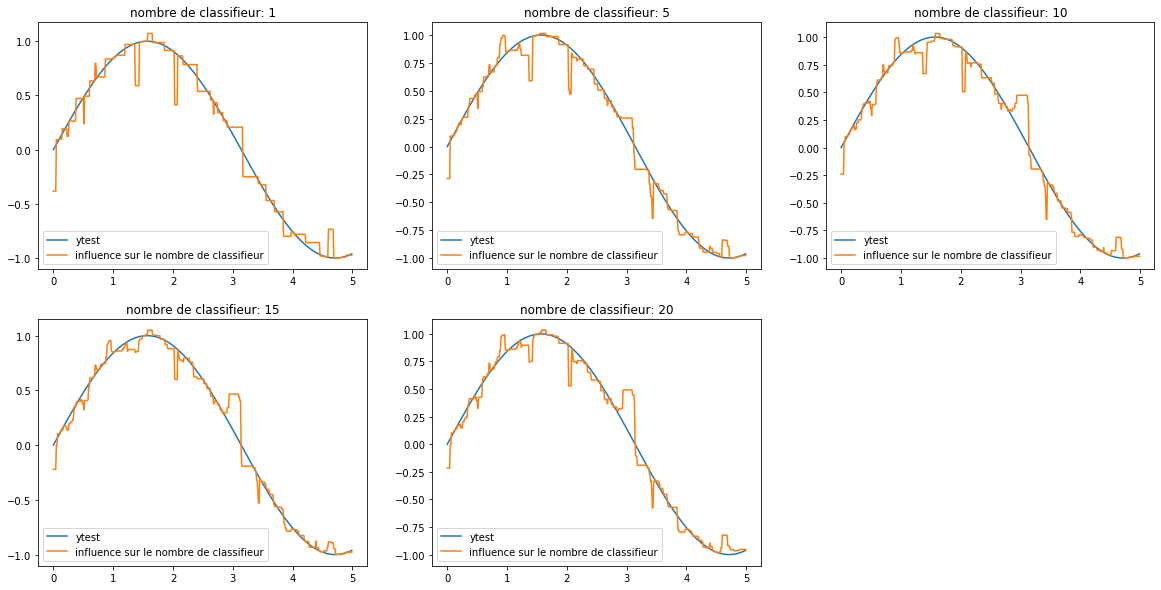

In [7]:
k=1
Ns= [1,5,10,15,20]
plt.figure(figsize=(20,10))

for n in Ns:
    
    regr2 = BaggingRegressor(n_estimators = n).fit(X,y)
    plt.subplot(2,3,k)
    plt.plot(X_test,y_test, label = "ytest")
    
    plt.plot(X_test,regr2.predict(X_test), label = "influence sur le nombre de classifieur")
    
    plt.title("nombre de classifieur: " + str(n))
    plt.legend(loc="best")
    
    k = k+1

plt.show()

### Q4. 
A quoi reconnaît-on que les estimateurs construits par les arbres sont biaisés et que le bagging réduit leur variance

### Q5.  
En jouant sur le niveau de bruit mettez en évidence le sur-apprentissage

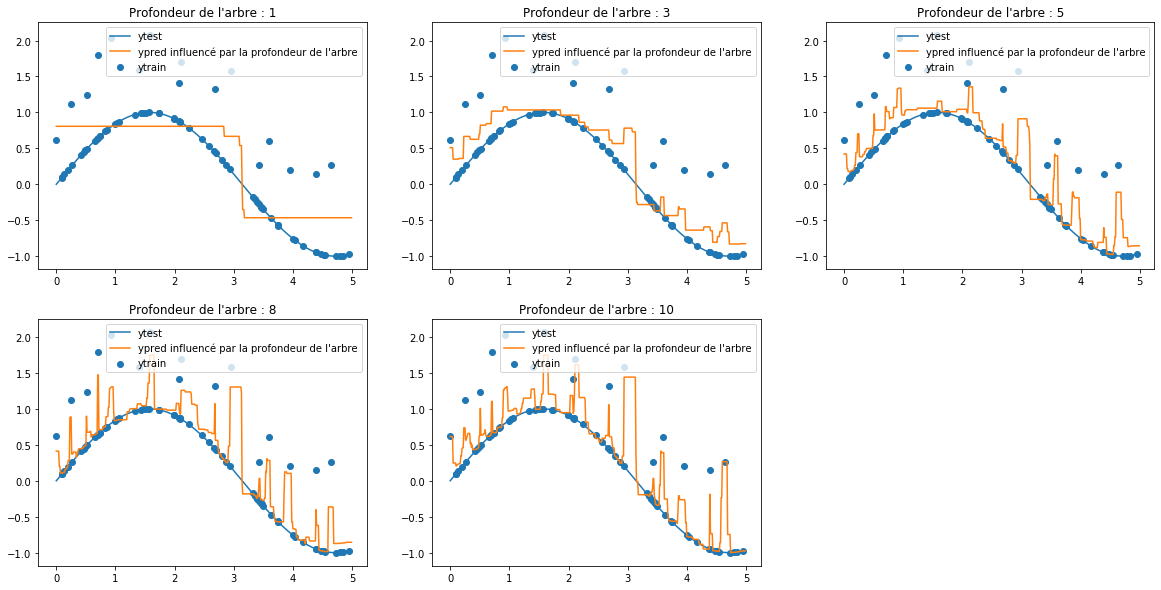

In [8]:
rng = np.random.RandomState(1)
X=np.sort(5*rng.rand(80,1), axis=0)
y=np.sin(X).ravel()
y[::5] += 1*(1.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()

k=1
Depths= [1,3,5,8,10]
plt.figure(figsize=(20,10))

for depth in Depths:
    
    
    regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth)).fit(X,y)
    plt.subplot(2,3,k)
    plt.plot(X_test,y_test, label = "ytest")
    plt.scatter(X,y, label= 'ytrain')
    plt.plot(X_test,regr.predict(X_test), label = "ypred influencé par la profondeur de l'arbre")
    
    plt.title("Profondeur de l'arbre : " + str(depth))
    plt.legend(loc="best")
    
    k = k+1

plt.show()

### Q6. 
Observer qu'on peut réduire ce phénomène en sous-échantillonnant aléatoirement (sans remise) au lieu de prendre des échantillons Bootstrap

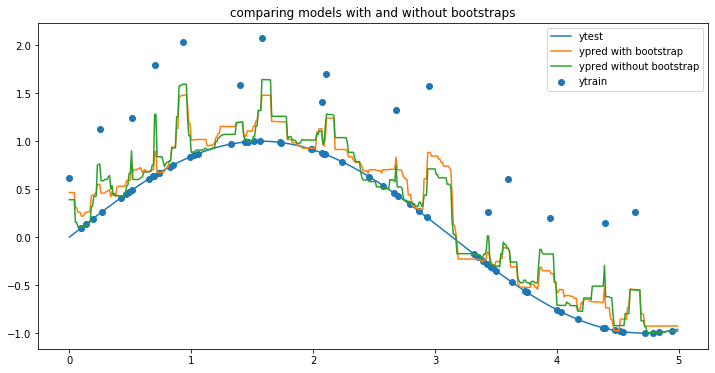

In [13]:
rng = np.random.RandomState(1)
X=np.sort(5*rng.rand(80,1), axis=0)
y=np.sin(X).ravel()
y[::5] += 1*(1.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()


clf_bs = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=20, max_samples =0.5, bootstrap=True).fit(X,y)
clf_no_bs= BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=20, max_samples =0.5, bootstrap=False).fit(X,y)

y_pred_bs= clf_bs.predict(X_test)
y_pred_no_bs=clf_no_bs.predict(X_test)


plt.figure(figsize=(12,6))
plt.scatter(X,y, label = 'ytrain')
    
plt.plot(X_test,y_test, label = "ytest")
plt.plot(X_test, y_pred_bs , label = "ypred with bootstrap")
plt.plot(X_test, y_pred_no_bs, label = "ypred without bootstrap")    
    
plt.title("comparing models with and without bootstraps")
plt.legend(loc="best")
plt.show()

### Random Forest

### Q7
Évaluez le score par 7-fold cross-validation des Random Forests sur les datasets boston, diabetes, iris et digits. Comparez ces performances avec celles d’un SVM linéaire.

In [23]:
#Regression
boston = datasets.load_boston()
X_boston = boston.data
y_boston = boston.target

diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

#Classification
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

rfc=RandomForestClassifier()
rfr=RandomForestRegressor()
svc=LinearSVC()
svr=SVR()


#Regression
print("Iris RandomForestClassifier score")
print(np.mean(cross_val_score(rfr, X_boston, y_boston, cv =7)))
print("Iris SVC score")
print((np.mean(cross_val_score(svr, X_boston, y_boston, cv =7))))

print("\nDiabetes RandomForestClassifier score")
print(np.mean(cross_val_score(rfr, X_diabetes, y_diabetes, cv =7)))
print("Diabetes SVC score")
print((np.mean(cross_val_score(svr, X_diabetes, y_diabetes, cv =7))))

#iris
print("\niris RFC score")
print(np.mean(cross_val_score(rfc, X_iris, y_iris, cv=7)))
print("iris SVM score")
print(np.mean(cross_val_score(svc, X_iris, y_iris, cv=7)))

#digits
print("\ndigits RFC score")
print(np.mean(cross_val_score(rfc, X_digits, y_digits, cv=7)))
print("digits SVM score")
print(np.mean(cross_val_score(svc, X_digits, y_digits, cv=7)))



Iris RandomForestClassifier score
0.6363152678594908
Iris SVC score


/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/py

-0.49988372581749557

Diabetes RandomForestClassifier score
0.38358319296467097
Diabetes SVC score
-0.048713720961409454

iris RFC score


/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ve

0.9464285714285714
iris SVM score
0.9523809523809523

digits RFC score


/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9047324410336065
digits SVM score


/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase th

0.9092105386066126


/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Q8.
En utilisant le dataset iris restreint aux deux premières variables explicatives afficher la probabilité de prédiction des classes.

In [24]:
from sklearn import preprocessing
#load data
iris = datasets.load_iris()
X_unscaled, y= iris.data[:,:2], iris.target
#Standardize
X = preprocessing.scale(X_unscaled)

In [25]:
rfc = RandomForestClassifier()
np.mean(cross_val_score(rfc, X,y, cv=7))

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/py

0.6938775510204082

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/py

([<matplotlib.patches.Wedge at 0x7fdcb9c90940>,
 [Text(-0.9661486405031772, 0.5258866840431147, '1'),
  Text(0.11834122489697822, -1.0936157252389356, '2'),
  Text(0.9039647925689283, 0.6267756008300057, '3')],
 [Text(-0.5269901675471875, 0.28684728220533523, '34.1%'),
  Text(0.0645497590347154, -0.5965176683121466, '35.2%'),
  Text(0.4930717050375971, 0.34187760045273036, '30.7%')])

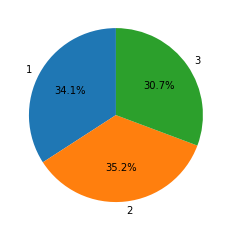

In [38]:
proba = cross_val_predict(rfc, X,y, cv=7, method = 'predict_proba')

plt.pie([proba[:,0].mean(),proba[:,1].mean(),proba[:,2].mean()], labels = [1,2,3], autopct = '%1.1f%%', startangle=90)

### Q9
Comparez les scores par 6-fold cross-validation des Random Forests et des arbres de décisions pures (obtenus avec DecisionTreeClassifier), sur le dataset digits. On fera varier le paramètre max_depth entre 1 et 15. Mettre en évidence le fait que les Random Forests permettent de réduire le sur-apprentissage, et ce même pour des arbres profonds.

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/py

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/py

/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yamhiroto/anaconda3/lib/py

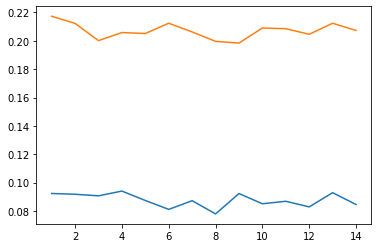

In [47]:
depths = list(range(1,15))
scores_rf=[]
scores_dt=[]
rfc= RandomForestClassifier()
dtc= DecisionTreeClassifier()

for depth in depths:
    score_dt = 1- np.mean(cross_val_score(dtc,X_digits,y_digits, cv=6))
    score_rf = 1 - np.mean(cross_val_score(rfc, X_digits, y_digits, cv=6))
    scores_dt.append(score_dt)
    scores_rf.append(score_rf)

plt.plot(depths, scores_rf)
plt.plot(depths, scores_dt)


### Q10.

$\mathbb E$ represente l'esperance sur la loi jointe des 2 variables x et y. Il est néanmoins suffisant de resoudre le probleme de minimisation en conditionnant par x.
comme $y \in \left \{-1, 1 \right \}$, on peut decomposer l'esperance en deux membres
\begin{align}
\mathbb E(exp(-Yf(X) | X = x) = \mathbb P(Y=1 | X=x)e^{-f(x)} + \mathbb P(Y=-1 | X=x)e^{f(x)}
\end{align}
En differenciant par f, on obtient:
\begin{align}
g' = -1 \times \mathbb P(Y=1 | X=x)e^{-f(x)} + 1 \times \mathbb P(Y=-1 | X=x)e^{f(x)}
\end{align}
Le minimum de g est obtenu quand g' = 0, soit en utilisant que  $e^{a}/e^{b}=e^{a-b}$
\begin{align}
g' = 0 &\iff \mathbb P(Y=1 | X=x)e^{-f(x)} = \mathbb P(Y=-1 | X=x)e^{f(x)} \\
       &\iff \frac{e^{f(x)}}{e^{-f(x)}} = \frac{\mathbb P(Y=1 | X=x)}{\mathbb P(Y=-1 | X=x)} \\
       &\iff 2f(x) = log(\left( \frac{\mathbb P(Y=1 | X=x)}{\mathbb P(Y=-1 | X=x)} \right) \\
       &\iff f(x) = \frac{1}{2} log\left( \frac{\mathbb P(Y=1 | X=x)}{\mathbb P(Y=-1 | X=x)} \right)
      \end{align}



### Q11.

le classifier de Bayes associe au risque 0/1, $R_{\phi_0}$ est $h^*_{0/1} = sign(2\eta - 1)$
le classifier de Bayes associe au risque $R_{exp}$ est $h^*_{exp} = sign(f^*_{exp})$ avec $f_{exp}^*= \frac{1}{2} log\left(\frac{\eta(x)}{1-\eta(x)}\right)$
$\eta(x) > 0.5 \Rightarrow sign(2\eta - 1) = sign(f^*_{exp}) = 1$
$\eta(x) < 0.5 \Rightarrow sign(2\eta - 1) = sign(f^*_{exp}) = -1$
Donc les deux classifiers sont les memes.

### Boosting

### Q14
 Mettre en œuvre AdaBoost avec des arbres de profondeur 1, puis 2, puis 10, sur le jeu de données digits. On calculera notamment la précision obtenue par 6-fold cross-validation. 

In [50]:
from sklearn.ensemble import AdaBoostClassifier

depthss = [1,2,10]
for depth in depthss:
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = depth))
    print("depth : " + str(depth))
    print(np.mean(cross_val_score(clf, X_digits, y_digits, cv = 6)))

depth : 1
0.2641850696745583
depth : 2
0.5953357729577258
depth : 10
0.9465959062421508


### Q15
Appliquer AdaBoost sur les données digits découpées en deux échantillons : apprentissage (75%) et test (25%). Tracer les erreurs (0/1) d’apprentissage et de test en fonction du nombre d’itérations.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state =42)